<a href="https://colab.research.google.com/github/gayatridevi524/project-folder-524/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP-1: Importing the Libraries**



In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import nltk # importing natural language tool kit
from nltk.corpus import stopwords # from corpus module importing stopwords used to remove(is,was etc..)
from nltk.classify import SklearnClassifier #classification based model
from nltk.stem import WordNetLemmatizer #reduces the words into its base form

In [3]:
#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

"**wordcloud** is a data visualization technique displays the text where the size of words displayed based on its frequency"

In [4]:
pip install wordcloud

In [5]:
from wordcloud import WordCloud,STOPWORDS

**STEP-2: Load the Dataset**

In [6]:
# Loading files from the colab
from google.colab import files
uploaded = files.upload()


Saving sentiment_train.csv to sentiment_train (1).csv


In [7]:
#reads the csv file
data = pd.read_csv("sentiment_train.csv",encoding="ISO-8859-1")#used to specify the character encoding of the input data.
#prints the loaded dataset
data

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


**STEP-3 : Exploratory Data Analysis**

In [8]:
#returns the shape of the dataset
data.shape

(99989, 3)

In [9]:
#returns the structure and type of data stored
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [10]:
#returns the first 10 rows of the data
data.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [11]:
#returns the columns specified in the data
data.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [12]:
# calculates the number of null values in each column of the data
data.isna().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [13]:
# checks for the duplicated values
data.duplicated().sum()

0

In [14]:
 # Droping out the irrelevant column as it was no longer required
 data=data.drop(['ItemID'],axis=1)

In [15]:
data.columns

Index(['Sentiment', 'SentimentText'], dtype='object')

**STEP-4: Data Visualization of Target Variables**

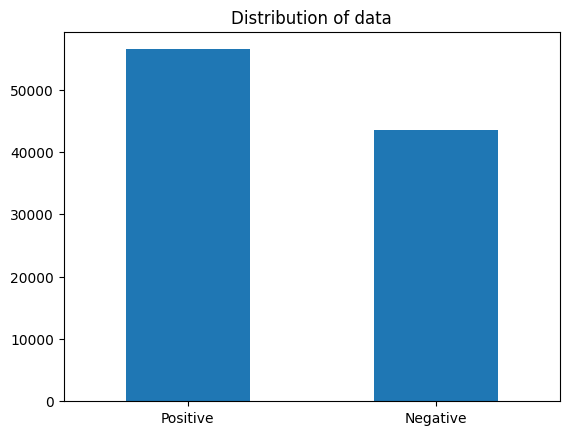

In [16]:
# Plotting the distribution
ax = data['Sentiment'].value_counts().plot(kind='bar', title='Distribution of data')
ax.set_xticklabels(['Positive', 'Negative'], rotation=0)
plt.show()

<Axes: xlabel='Sentiment', ylabel='count'>

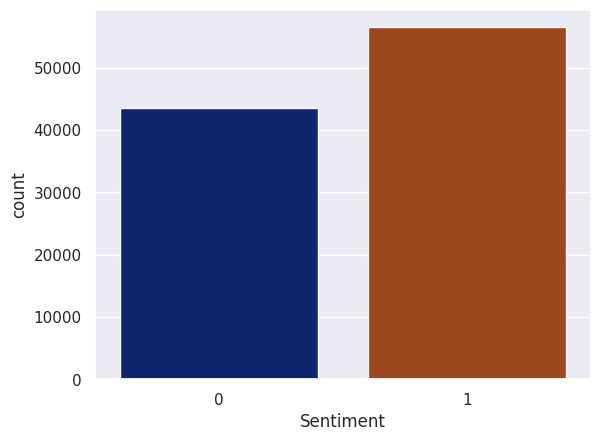

In [17]:
sns.set_theme(style="darkgrid", palette="dark")
sns.countplot(x='Sentiment', data=data)

**STEP-5: Data Preprocessing**

In [18]:
#Create data_positive and data_negative subsets
data_positive = data[data['Sentiment'] == 1]
data_negative = data[data['Sentiment'] == 0]

In [19]:
data_positive

,Sentiment,SentimentText
2,1,omg its already 7:30 :O
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)
11,1,thanks to all the haters up in my face a...
...,...,...
99980,1,@cunningstunts22 afternoon jim hows you x
99982,1,@Cup_Of_Katy Have fun doing health &amp; safet...
99985,1,@cupcake__ arrrr we both replied to each other...
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [20]:
data_negative

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?
...,...,...
99975,0,@ctham @mommyfizz cuz you big burly man. haha...
99981,0,@cup_a_tea The foot is really bad. Like the wo...
99983,0,@cupati It took me waaay too long to get your ...
99984,0,@Cupcake seems like a repeating problem hop...


In [21]:
# Concatenate the positive and negative datasets
dataset = pd.concat([data_positive, data_negative])

In [22]:
dataset

,Sentiment,SentimentText
2,1,omg its already 7:30 :O
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)
11,1,thanks to all the haters up in my face a...
...,...,...
99975,0,@ctham @mommyfizz cuz you big burly man. haha...
99981,0,@cup_a_tea The foot is really bad. Like the wo...
99983,0,@cupati It took me waaay too long to get your ...
99984,0,@Cupcake seems like a repeating problem hop...


In [23]:
#convert the text into lowercase
dataset['SentimentText']=dataset['SentimentText'].str.lower()
dataset['SentimentText'].tail()

99975    @ctham @mommyfizz cuz you big burly man.  haha...
99981    @cup_a_tea the foot is really bad. like the wo...
99983    @cupati it took me waaay too long to get your ...
99984    @cupcake  seems like a repeating problem   hop...
99986                       @cupcake_2120 ya i thought so 
Name: SentimentText, dtype: object

In [24]:
# Download the stopwords list (only required for the first time)
nltk.download('stopwords')

# Load the English stopwords
stopwords = stopwords.words('english')

# Print the stopwords
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import string

StopWords = set(stopwords) # set of stopwords
english_punctuations = string.punctuation # built-in function that contains all english punctautions

#Cleaning and removing the above stop words list from the tweet text
def cleaning_stopwords(SentimentText):
    return " ".join([word for word in str(SentimentText).split() if word not in StopWords])

#Cleaning and removing punctuations
def cleaning_punctuations(SentimentText):
    translator = str.maketrans('', '', english_punctuations)
    return SentimentText.translate(translator)

#Cleaning and removing repeating characters
def cleaning_repeating_char(SentimentText):
    return re.sub(r'(.)\1+', r'\1', SentimentText)

#Cleaning and removing URLs
def cleaning_URLs(SentimentText):
    return re.sub('((www.[^\s]+)|(https?://[^\s]+))', ' ', SentimentText)

#Cleaning and removing numeric numbers
def cleaning_numbers(SentimentText):
    return re.sub('[0-9]+', '', SentimentText)

# Apply cleaning functions to 'text' column in the dataset
dataset['SentimentText'] = dataset['SentimentText'].apply(cleaning_stopwords)
dataset['SentimentText'] = dataset['SentimentText'].apply(cleaning_punctuations)
dataset['SentimentText'] = dataset['SentimentText'].apply(cleaning_repeating_char)
dataset['SentimentText'] = dataset['SentimentText'].apply(cleaning_URLs)
dataset['SentimentText'] = dataset['SentimentText'].apply(cleaning_numbers)

dataset['SentimentText'].tail()

99975    ctham momyfiz cuz big burly man hahahahahahaha...
99981    cupatea fot realy bad like worst ever ben bare...
99983    cupati tok way long get mesage ashamedright re...
99984    cupcake sems like repeating problem hope able ...
99986                                   cupcake ya thought
Name: SentimentText, dtype: object

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
from nltk.tokenize import word_tokenize

# Convert non-string values to strings before tokenizing
dataset['SentimentText'] = dataset['SentimentText'].apply(lambda x: str(x))
dataset['SentimentText'] = dataset['SentimentText'].apply(word_tokenize)

dataset['SentimentText'].head()

2                          [omg, already, o]
6                             [just, chilin]
8     [handed, uniform, today, mis, already]
9                       [hm, wonder, number]
11               [thanks, haters, face, day]
Name: SentimentText, dtype: object

In [28]:
st = nltk.PorterStemmer()

# Define the stemming function
def stemming_on_text(data):
    text = [st.stem(word) for word in data]# Apply stemming to each word in the data
    return data

dataset['SentimentText']= dataset['SentimentText'].apply(lambda x: stemming_on_text(x))
dataset['SentimentText'].head()

2                          [omg, already, o]
6                             [just, chilin]
8     [handed, uniform, today, mis, already]
9                       [hm, wonder, number]
11               [thanks, haters, face, day]
Name: SentimentText, dtype: object

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
lm = nltk.WordNetLemmatizer()

# Defining the lemmatizing function
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]# Apply lemmatizer on each word
    return data

dataset['SentimentText'] = dataset['SentimentText'].apply(lambda x: lemmatizer_on_text(x))
dataset['SentimentText'].head()

2                          [omg, already, o]
6                             [just, chilin]
8     [handed, uniform, today, mis, already]
9                       [hm, wonder, number]
11               [thanks, haters, face, day]
Name: SentimentText, dtype: object

In [31]:
# Categorizing dependent and independent variables
X=data.SentimentText
y=data.Sentiment

In [32]:
positive_text = ' '.join(data_positive['SentimentText'])

# Create wordcloud objects for positive and negative sentiments
positive_wordcloud = WordCloud().generate(positive_text)

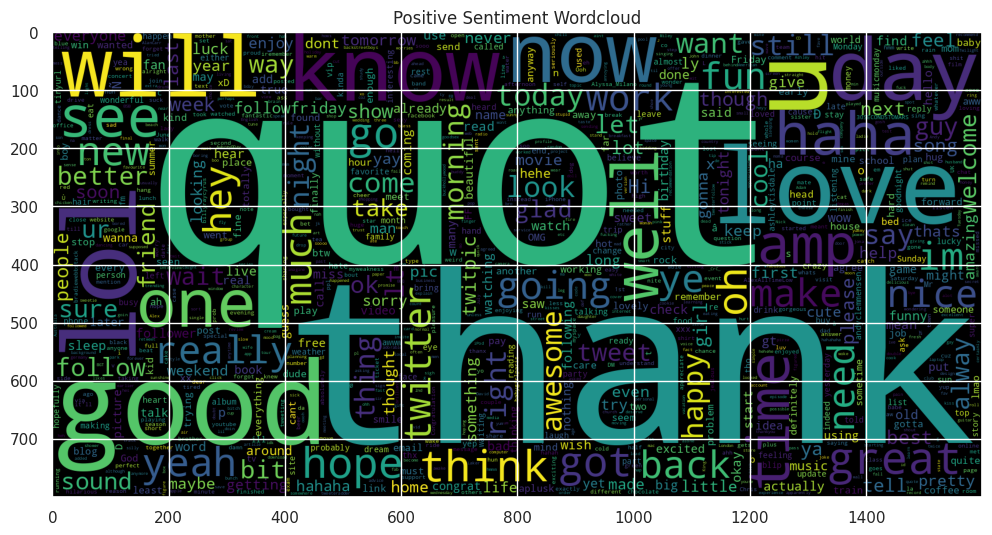

In [33]:
# Visualizing the positive text using wordcloud
plt.figure(figsize = (12,8))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(positive_text)
plt.title('Positive Sentiment Wordcloud')
plt.imshow(wc)

In [34]:
negative_text = ' '.join(data_negative['SentimentText'])

# Create wordcloud objects for positive and negative sentiments
negative_wordcloud = WordCloud().generate(negative_text)

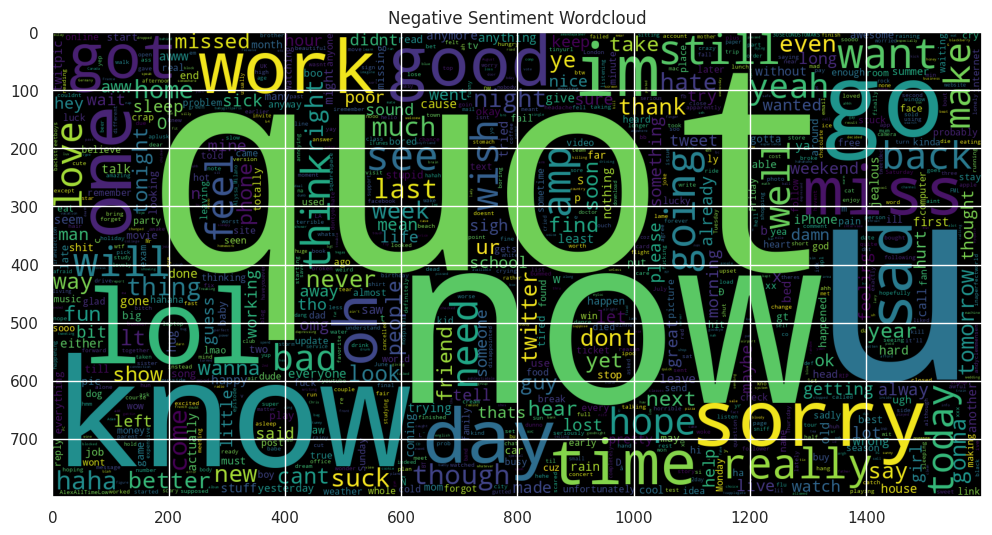

In [35]:
# Visualizing the negative text using wordcloud
plt.figure(figsize = (12,8))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(negative_text)
plt.title('Negative Sentiment Wordcloud')
plt.imshow(wc)

**STEP-6: Splitting Our Data Into Train and Test Subsets**

In [36]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [37]:
# Importing all the models and metrics to evaluate
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

**TfidfVectorizer** is a popular vectorization technique that converts a collection of raw text documents into a numerical representation

In [38]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [39]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

**STEP-7 : Model  Building and Evaluation**

In [40]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

Model-1

In [41]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred1 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2167
           1       0.82      0.83      0.82      2833

    accuracy                           0.80      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.80      0.80      0.80      5000



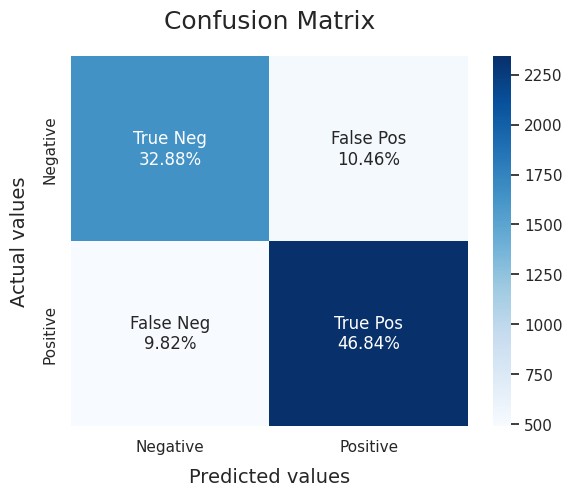

In [42]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
categories = ['Negative', 'Positive']
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
plt.show()

"ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the performance of a binary classification model across different discrimination thresholds. "

"The area under the ROC curve (AUC) is a single scalar value that quantifies the overall performance of the classifier. It represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. "

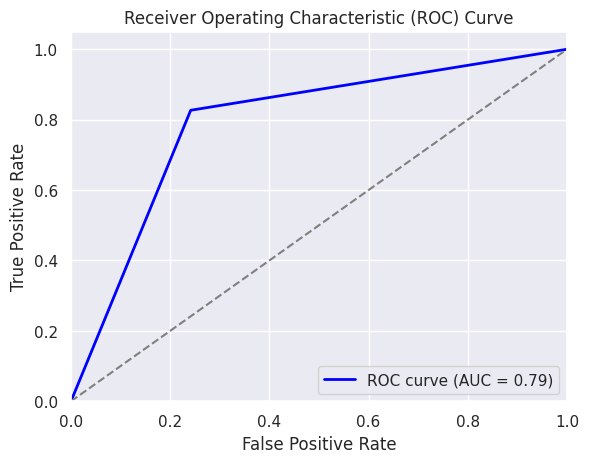

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Model 2

In [44]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred2 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      2167
           1       0.81      0.84      0.82      2833

    accuracy                           0.80      5000
   macro avg       0.80      0.79      0.79      5000
weighted avg       0.80      0.80      0.80      5000



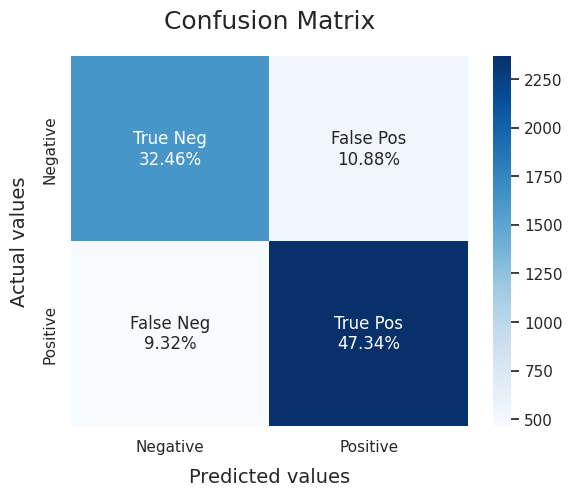

In [45]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred2)
categories = ['Negative', 'Positive']
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
plt.show()

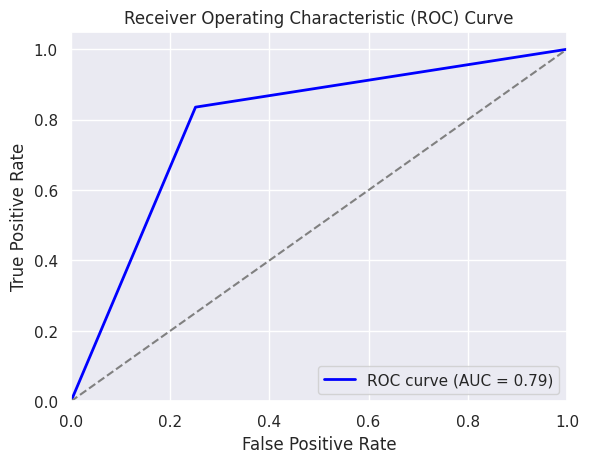

In [46]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Based on the above Model Evaluation Metrics both the models SVM, Logistic Regression have scored the same accuracy score i.e.,80%.The F1-scores for both classes are the same for both models (Class 0: 0.76 and Class 1: 0.82).Both models have similar overall performance, but Model-2 shows slightly better recall for Class 0 and Class 1. On the other hand, Model-1 has slightly better precision for both classes.Therefore, I have concluded that both the models Logistic Regression and Support Vector Machine(SVM) are the best model for the above-given dataset.

**Conclusion**:The purpose of Twitter sentiment analysis is to analyze the sentiment or the emotional tone expressed in tweets posted on the social media platform Twitter. It involves using natural language processing (NLP) and machine learning techniques to classify tweets into different sentiment categories either positive or negative.In both models, the precision, recall, and F1-scores for positive sentiment (Class 1) are consistently higher compared to negative sentiment (Class 0). This indicates that the models are more accurate in predicting positive sentiment than negative sentiment.

Therefore, based on the provided metrics evaluation, we can conclude that the majority sentiment in people's tweets is more likely to be positive.